In [2]:
import os
import sys
import torch
import numpy as np
import torch.nn as nn
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
from torch.nn import functional as F

import pytorch_lightning as pl


from pathlib import Path
import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np



In [3]:
cwd = os.getcwd()
module_path = "/".join(cwd.split('/')[0:-1])
    
if module_path in sys.path:
    print("yes")
    sys.path.remove(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)



# Checking data-loaders

In [4]:
from src.dataset.ambiguousMNIST import get_ambiguousMnist_loaders

In [8]:
data_root = '/'.join(os.getcwd().split('/')[:-1]) + '/data-store'

## Ambiguous MNIST

In [45]:
data_root

'/Users/vinay/Projects/uncertainty-estimates/data-store'

In [6]:
amb_mnist_loader = get_ambiguousMnist_loaders(data_root, False, 1)

torch.Size([1, 1, 28, 28])
tensor([5])


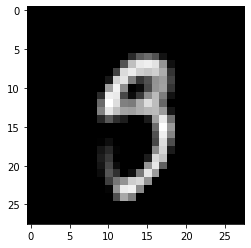

In [19]:
%matplotlib inline
sample = None
for x,y in amb_mnist_loader:
    print(x.shape)
    print(y)
    sample = x
    plt.imshow(sample.squeeze(),cmap = plt.cm.gray)
    break

## MNIST

In [10]:
from src.dataset.MNIST import get_MNIST_loaders

In [11]:
trn_mnist = get_MNIST_loaders(data_root,True, 1)

torch.Size([1, 1, 28, 28])
tensor([7])


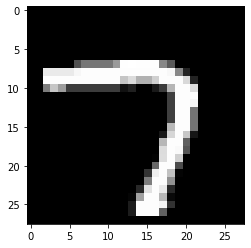

In [12]:
%matplotlib inline
sample = None
for x,y in trn_mnist:
    print(x.shape)
    print(y)
    sample = x
    plt.imshow(sample.squeeze(),cmap = plt.cm.gray)
    break

## FashionMNIST

In [5]:
from src.dataset.fashionMNIST import get_fashionMNIST_loaders


In [8]:
trn_fmnist = get_fashionMNIST_loaders(data_root,True, 1)

4


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/vinay/Projects/uncertainty-estimates/data-store/FashionMNIST/raw



/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


torch.Size([1, 1, 28, 28])
tensor([0])


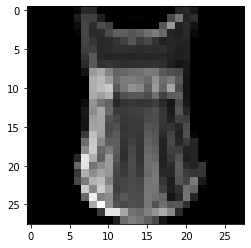

In [10]:
%matplotlib inline
sample = None
for x,y in trn_fmnist:
    print(x.shape)
    print(y)
    sample = x
    plt.imshow(sample.squeeze(),cmap = plt.cm.gray)
    break

DATA-LOADERS WORKING FINE

# Checking models

In [15]:
from src.dataset.loaders import get_loaders

In [16]:
trn_ldr = get_loaders(data_root,'train',10,data_type='mnist')

num_workers:4


In [18]:
vld_ldr = get_loaders(data_root,'valid',10,data_type='mnist')

num_workers:4


In [39]:
from src.models import vgg16,resnet18

In [23]:
sample_x,sample_y = None,None
for xb,yb in trn_ldr:
    sample_x = xb
    sample_y = yb
    break
    

/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/vinay/mambaforge/envs/uncertainty-estimates/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [24]:
sample_x.shape

torch.Size([10, 1, 28, 28])

In [32]:
vgg16_model = vgg16(spectral_normalization = False,
                    mod = False,
                    mnist = True)

In [33]:
vgg_out = vgg16_model(sample_x)

In [35]:
vgg_out.shape

torch.Size([10, 10])

In [42]:
resnet_model = resnet18(spectral_normalization = False,
                    mod = False,
                    mnist = True)

In [43]:
resnet_out= resnet_model(sample_x)

In [ ]:
# We will study the effect of resnet

In [44]:
sample_y

tensor([0, 0, 1, 7, 8, 7, 1, 1, 3, 4])

In [46]:
import pandas as pd

In [47]:
!pwd

/Users/vinay/Projects/uncertainty-estimates/nbs


In [48]:
trani_csv = pd.read_csv('/Users/vinay/Projects/uncertainty-estimates/src/outputs/2022-01-14/14-21-52/csv_logs/0/version_0/metrics.csv')

In [49]:
trani_csv

,train_loss,epoch,step,val_acc,train_acc
0,0.041661,0,99,NaN,NaN
1,0.049320,0,199,NaN,NaN
2,NaN,0,224,0.983933,NaN
3,NaN,0,224,NaN,0.965733
4,0.039360,1,299,NaN,NaN
5,0.024270,1,399,NaN,NaN
6,NaN,1,449,0.989600,NaN
7,NaN,1,449,NaN,0.989889
